In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


[Text(0.5, 1.0, 'My plot'), Text(0.5, 0, 'x-axis'), Text(0, 0.5, 'y-axis')]

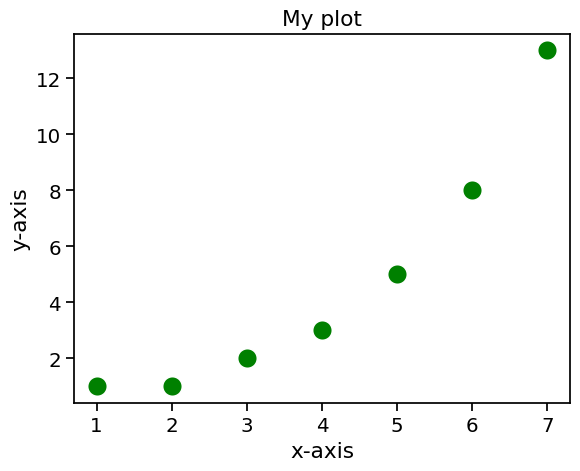

In [17]:
fibonacci = [1,1,2,3,5,8,13]
x = [1,2,3,4,5,6,7]

# By the way, instead of x = [1,2,3,4,5,6,7] we could have also written
#x = range(1,len(fibonacci)+1)
# This achieves the same thing, and could be useful e.g. if we didn't know how long the fibonacci list was.

sns.set_context("notebook", font_scale=1.3)

ax = sns.scatterplot(x = x, y = fibonacci, s=200, color='green')
ax.set(title = 'My plot', xlabel = 'x-axis', ylabel='y-axis')


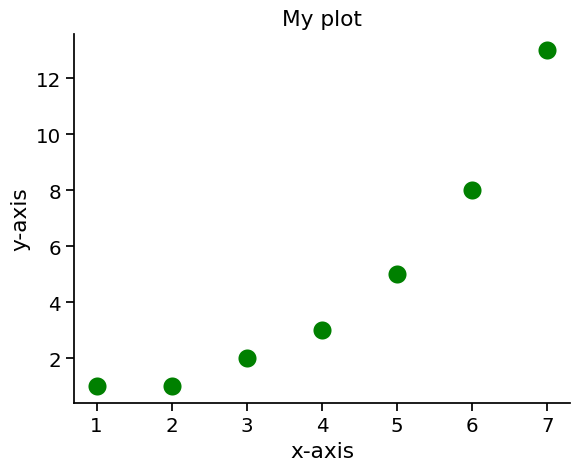

In [18]:
fibonacci = [1,1,2,3,5,8,13]
x = [1,2,3,4,5,6,7]

# By the way, instead of x = [1,2,3,4,5,6,7] we could have also written
#x = range(1,len(fibonacci)+1)
# This achieves the same thing, and could be useful e.g. if we didn't know how long the fibonacci list was.

sns.set_context("notebook", font_scale=1.3)

ax = sns.scatterplot(x = x, y = fibonacci, s=200, color='green')
ax.set(title = 'My plot', xlabel = 'x-axis', ylabel='y-axis')
sns.despine(top = True, right = True)


In [21]:
afl_margins = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_margins.csv')
afl_margins.head()


,afl.margins
0,56
1,31
2,56
3,8
4,32


<Axes: xlabel='afl.margins', ylabel='Count'>

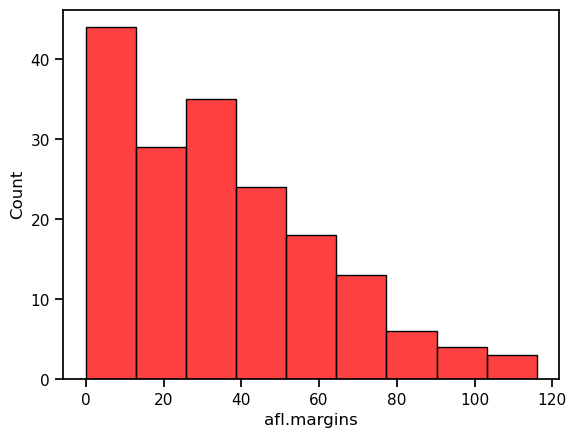

In [23]:
sns.set_context("notebook", font_scale = 1)

sns.histplot(data = afl_margins, x="afl.margins", color='red')

Text(0.5, 1.0, 'Too many bins!')

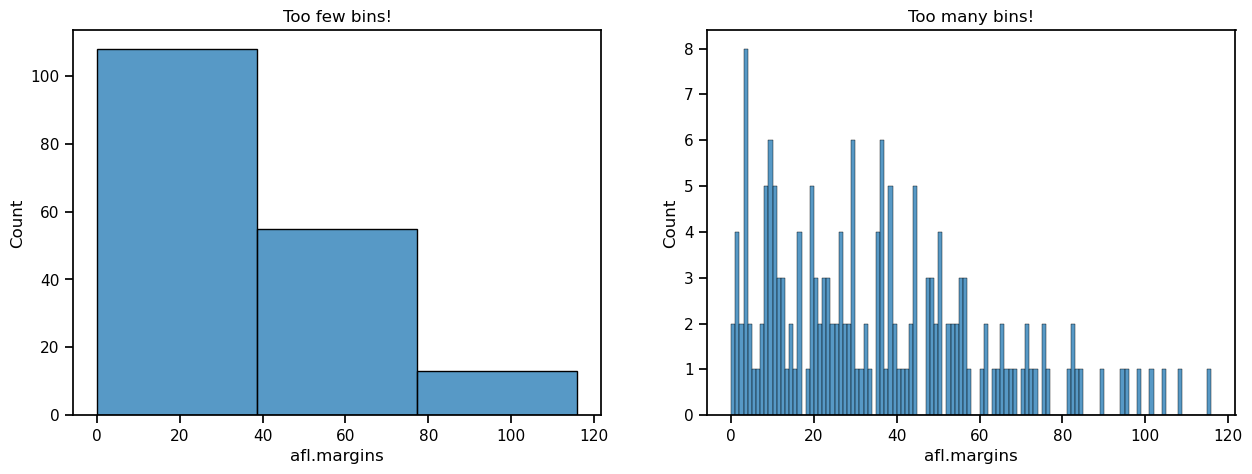

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) #assigns a figure with axes

ax1 = sns.histplot(data = afl_margins, x="afl.margins", bins = 3, ax=axes[0]) # [0] makes first in list of plots
ax2 = sns.histplot(data = afl_margins, x="afl.margins", bins = 116, ax=axes[1])

axes[0].set_title("Too few bins!")
axes[1].set_title("Too many bins!")

In [26]:
afl_margins.describe()


,afl.margins
count,176.000000
mean,35.301136
std,26.073636
min,0.000000
25%,12.750000
50%,30.500000
75%,50.500000
max,116.000000


<Axes: ylabel='afl.margins'>

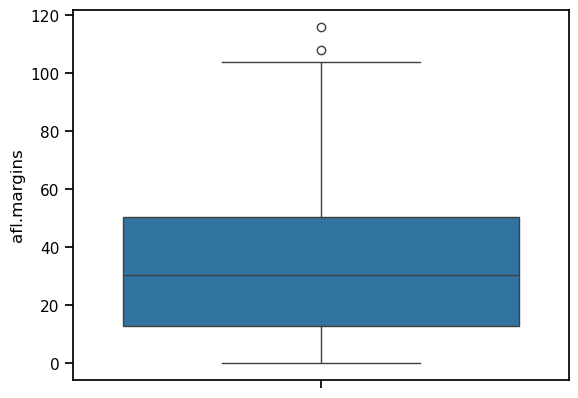

In [29]:
sns.boxplot(data = afl_margins, y = 'afl.margins')



<Axes: xlabel='afl.margins'>

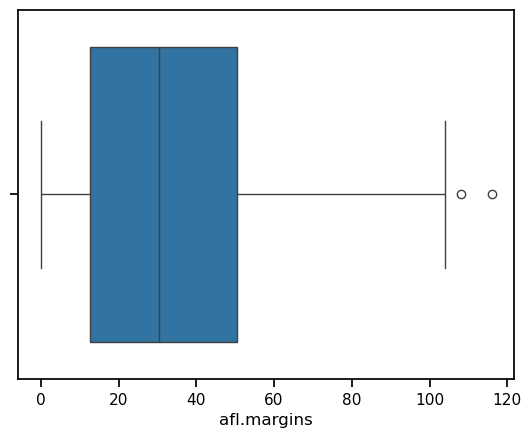

In [30]:
sns.boxplot(data = afl_margins, x = 'afl.margins')

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl2small.csv')
df.head()

,margin,year
0,33,1987
1,59,1987
2,45,1987
3,91,1987
4,39,1987


In [32]:
df.tail()

,margin,year
4291,5,2010
4292,41,2010
4293,24,2010
4294,0,2010
4295,56,2010


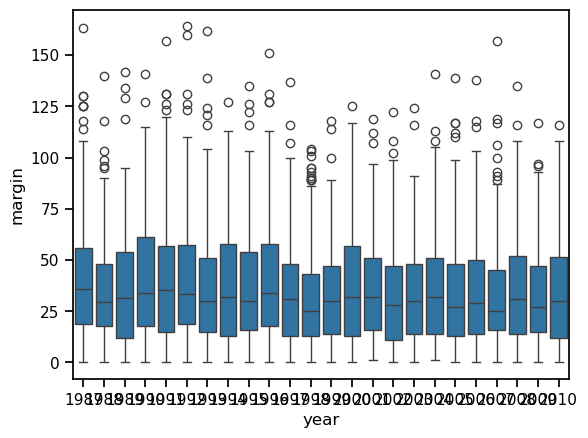

In [33]:
ax = sns.boxplot(x = 'year', y = 'margin', data = df)

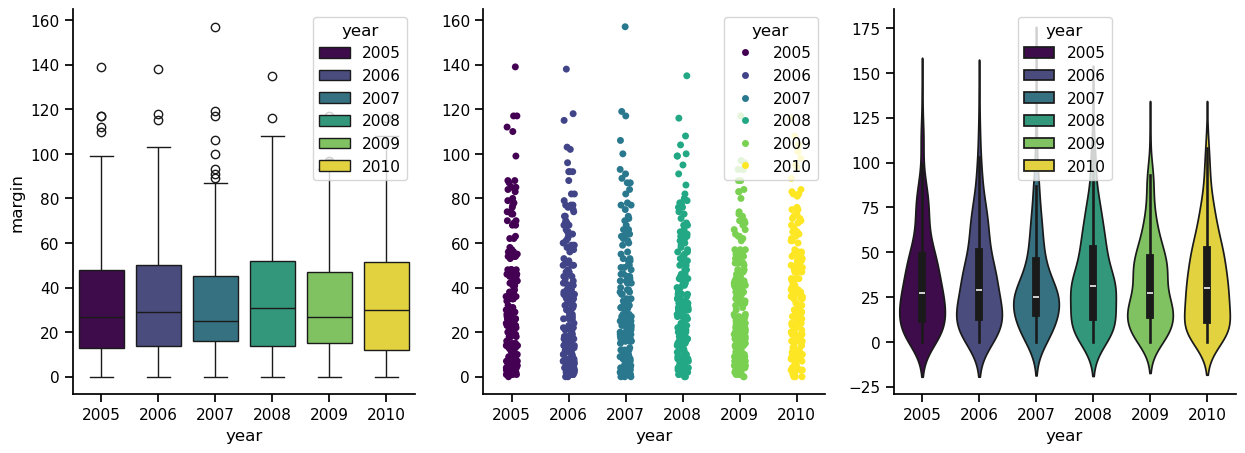

In [48]:
df = df[df['year'] > 2004]

#working with coloring

norm = plt.Normalize(df['year'].min(), df['year'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
colors = sm.to_rgba(df['year'])
#=========



fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#coloring
unique_years = df['year'].unique()
palette = dict(zip(unique_years, [sm.to_rgba(year) for year in unique_years]))


ax1 = sns.boxplot(x = 'year', y = 'margin', data = df, hue='year', palette=palette, ax=axes[0]) #hue and palette for colors
ax2 = sns.stripplot(x = 'year', y = 'margin', data = df, hue='year', palette=palette, ax=axes[1])
ax3 = sns.violinplot(x = 'year', y = 'margin', data = df, hue='year', palette=palette, ax=axes[2])

ax2.set(ylabel = '')
ax3.set(ylabel = '')

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


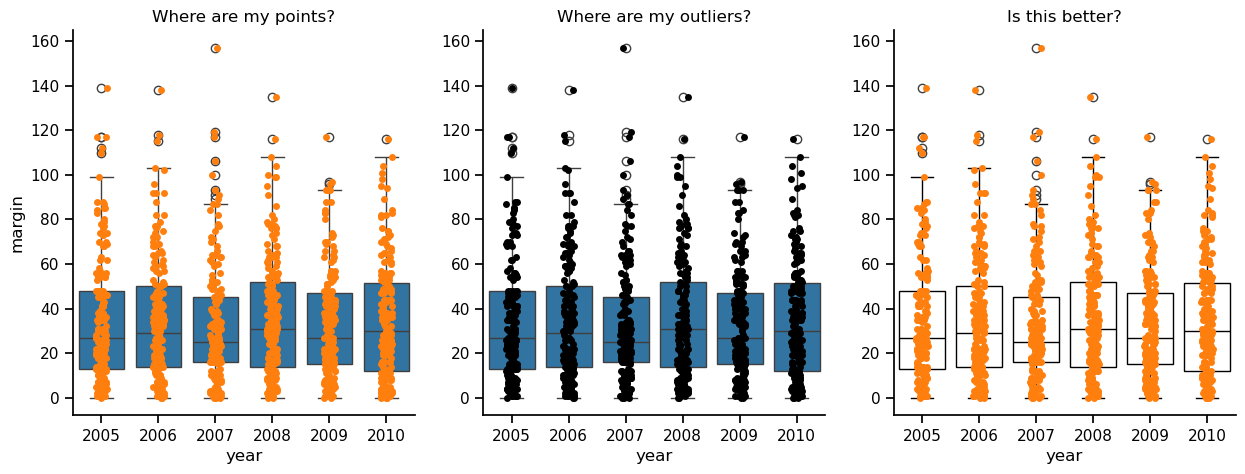

In [49]:
properties = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


ax1 = sns.boxplot(x = 'year', y = 'margin', data = df, ax=axes[0])
ax1 = sns.stripplot(x = 'year', y = 'margin', data=df, ax=axes[0])

ax2 = sns.boxplot(x = 'year', y = 'margin', data = df, ax=axes[1])
ax2 = sns.stripplot(x = 'year', y = 'margin', data=df, color = 'black', ax=axes[1])

ax3 = sns.boxplot(x = 'year', y = 'margin', data = df, **properties, ax=axes[2])
ax3 = sns.stripplot(x = 'year', y = 'margin', data=df, ax=axes[2])

axes[0].set_title("Where are my points?")
axes[1].set_title("Where are my outliers?")
axes[2].set_title("Is this better?")


ax2.set(ylabel = '')
ax3.set(ylabel = '')

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv')
df.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


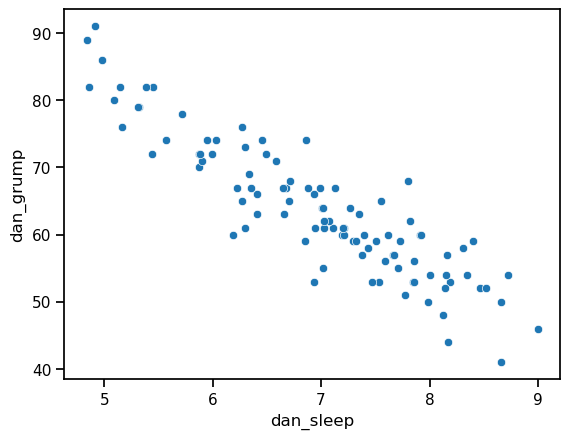

In [51]:
ax = sns.scatterplot(x = 'dan_sleep', y = 'dan_grump', data = df)

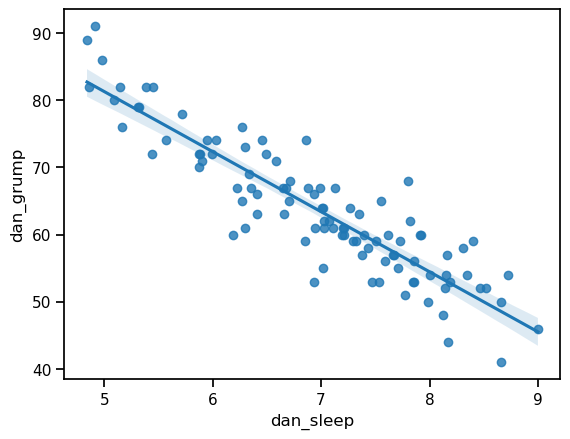

In [52]:
ax = sns.regplot(x = 'dan_sleep', y = 'dan_grump', data = df)

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_finalists.csv')

In [54]:
# count up the number of times each team has been in the finals
finalists = df['afl.finalists'].value_counts()

# convert the result to a dataframe
df2 = finalists.to_frame()

# convert the row names to a column of data
df2.index.name = 'Team'
df2.reset_index(inplace=True)

# rename columns with clearer names
df2.columns = ['Team', 'Finals']

df2

,Team,Finals
0,Geelong,39
1,West Coast,38
2,Essendon,32
3,Melbourne,28
4,Collingwood,28
5,North Melbourne,28
6,Hawthorn,27
7,Carlton,26
8,Adelaide,26
9,Sydney,26


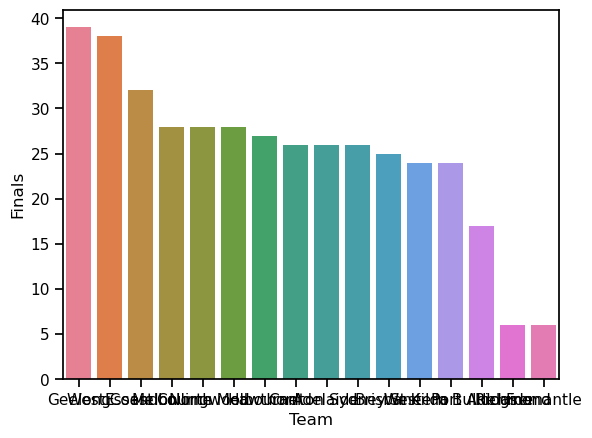

In [60]:
unique_teams = df2['Team'].unique()
palette = sns.color_palette("husl", len(unique_teams))  # Using a seaborn color palette with unique colors

# Create a dictionary mapping teams to colors
color_dict = dict(zip(unique_teams, palette))
ax = sns.barplot(x = 'Team', y = 'Finals', data = df2, hue='Team', palette = color_dict)

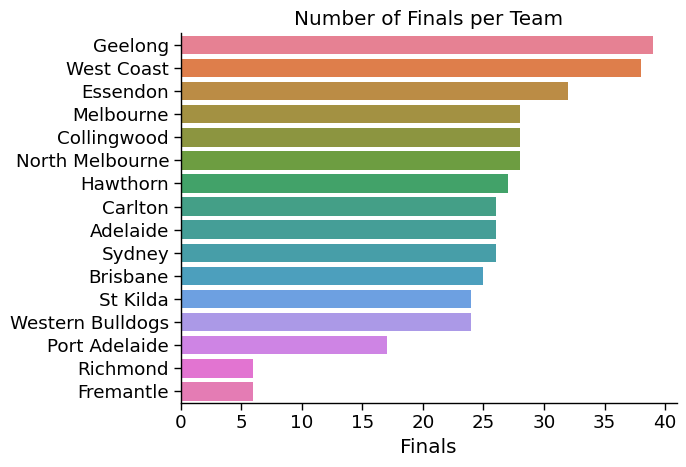

In [66]:
ax = sns.barplot(y = 'Team', x = 'Finals', data = df2, hue='Team', palette = color_dict)
ax.set(title = 'Number of Finals per Team', xlabel = 'Finals', ylabel='')
sns.despine(top=True, right=True)

plt.savefig('/Users/TRUTH/JupyterWork/pythonstats/MyBarGraph.png', facecolor='white', bbox_inches='tight')